# Telemarketing Campaign Prediction - Nikhil Naik (nikhil281096@gmail.com)

## * Brief detail about this project:

>This project tackles a very wide spread problem of predicting behaviour based on certain pattern and history of similar behaviour. In this particular case, the project aims to solve the problem of predicting customer behaviour based on a bank survey. The prediction is to identify if the customer will buy a particular loan or not.

>To make this prediction we learn and train a algorithm using dataset of customer information and their past behaviour of purchase or no purchase. 

>This is a classic binary prediction problem in machine learning and can be solved by various classification algorithms.

>**This problem is particularly interesting to me because I was trying do a similar R&D project for my company in which we were trying to predict if a email was malicious or not based on the Meta data of the email. I know on the surface both implementation seem very different but in both cases we would be making binary classification based on some pattern of behaviour. This is the reason I choose this project.**












## *Deliverable and Detailed Explanation about the project:

- **Findings about the Data**
>By performing EDA we were able to find the following information

   1. There were empty values in the data which were dropped.
   2. There were 8 numeric and 11 categorical data.
   3. <a href='#spread_of_data'> Click here for </a> Analysis about data spread.
   4. After the <a href='#response_group_plot'> GroupBy output field plot </a> , It was clear that the data is heavily class imbalanced and further processing would be required.
   5. Many features were heavily skewed and contained outliers.




- **Manipulating data**
> Data in it's raw format could not be directly used and was modified to suit the implementation.

   1. Data was first label Encoded using sklearn module.
   2. To solve "Class Imbalance" Data was <a href='#undersampling'> undersampled </a> using **imblearn module's RandomUnderSampler.**
   3. The <a href='#undersample_plot'> plots </a> are consistent with that taken <a href='#spread_of_data_plot'> before  </a> hence it proves not much information was lost from data after undersampling.
   4. Data skewness and outliers were <a href='#skew_plot'> identified </a> and  <a href='#removing_outliers'> removed </a> using IQR technique.
   5. Plots after outliers were removed looked like <a href='#after_removing_outliers'> this. </a>
   6. Fields with very high correlations were also dropped.
   7. The Data was also scaled using SimpleScalar from sklearn.
   


- **Model creation and improving accuracy**
   1. First we <a href='#multi_model'> tested multiple models </a> for their performance out of which RandomForest performed the best.
   2. Trying to improve accuracy of RandomForest by doing **Hyper-parameter tuning** using <a href='#grid_search'> GridSearchCV. </a>
   3. Even after Parameter Tuning the accuracy did not increase much. The suspected reason was that after outlier removal, the data again got class imbalanced and this time it was solved by using  <a href='#smote'> oversampling technique </a> called **SMOTE** and was implemented using imblearn module. This increase the accuracy dramatically.
   
   
   
- **KNN vs Logistic Regression**
   1. The Oversmapled SMOTE data was further used to do Churn prediction.
   2. KNN and Logistic Regression model was used to do churn prediction.
   3. KNN model performed much better in doing the prediction as can be seen <a href='#knn_vs_lr'> here. </a>

## Resources -

- Data set which is uploaded in the repository was used.
- Jupyter Notebook (Python 3) with sklean, imblearn, matplotlib, seaborn, pandas, numpy, etc. was used as software
- Youtube videos and other online material was used as referrence, Published papers were not referred. 


## Personal Details -

- Name  : Nikhil S. Naik
- Email : nikhil281096@gmail.com
- Phone : 9930330503

# Project Code -

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv('bank_marketing.csv')

C:\Users\Void\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [4]:
column_description = df.iloc[0]
df = df.drop(0)

In [5]:
df.columns = df.iloc[0]

In [6]:
df = df.drop(1)
df = df.reset_index(drop=True)

In [7]:
df.head()

1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [8]:
df.shape

(45211, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  45211 non-null  object
 1   age         45191 non-null  object
 2   salary      45211 non-null  object
 3   balance     45211 non-null  object
 4   marital     45211 non-null  object
 5   jobedu      45211 non-null  object
 6   targeted    45211 non-null  object
 7   default     45211 non-null  object
 8   housing     45211 non-null  object
 9   loan        45211 non-null  object
 10  contact     45211 non-null  object
 11  day         45211 non-null  object
 12  month       45161 non-null  object
 13  duration    45211 non-null  object
 14  campaign    45211 non-null  object
 15  pdays       45211 non-null  object
 16  previous    45211 non-null  object
 17  poutcome    45211 non-null  object
 18  response    45181 non-null  object
dtypes: object(19)
memory usage: 6.6+ MB


In [10]:
df = df.apply(pd.to_numeric, errors='ignore')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

## Performing EDA

In [12]:
df.describe()

1,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


### There are 8 numerical fields.
>Namely. customerid,	age,	salary,	balance,	day,	campaign,	pdays,	previous

In [13]:
df.isnull().sum()

1
customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

### There are empty values in fields age, month, response

In [14]:
df.dropna(inplace=True)

In [15]:
object_type = list(df.select_dtypes(include=['object']).columns)
numeric_type = list(df.select_dtypes(include=['float64', 'int64']).columns)

In [16]:
object_type

['marital',
 'jobedu',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'duration',
 'poutcome',
 'response']

In [17]:
for column in object_type:
    print('There are %s unique catergories in column %s' % (len(df[column].unique()), column))

There are 3 unique catergories in column marital
There are 48 unique catergories in column jobedu
There are 2 unique catergories in column targeted
There are 2 unique catergories in column default
There are 2 unique catergories in column housing
There are 2 unique catergories in column loan
There are 3 unique catergories in column contact
There are 12 unique catergories in column month
There are 2644 unique catergories in column duration
There are 4 unique catergories in column poutcome
There are 2 unique catergories in column response


<a id='spread_of_data_plot'></a>

## Analysis of Spread of Data amoung various categories

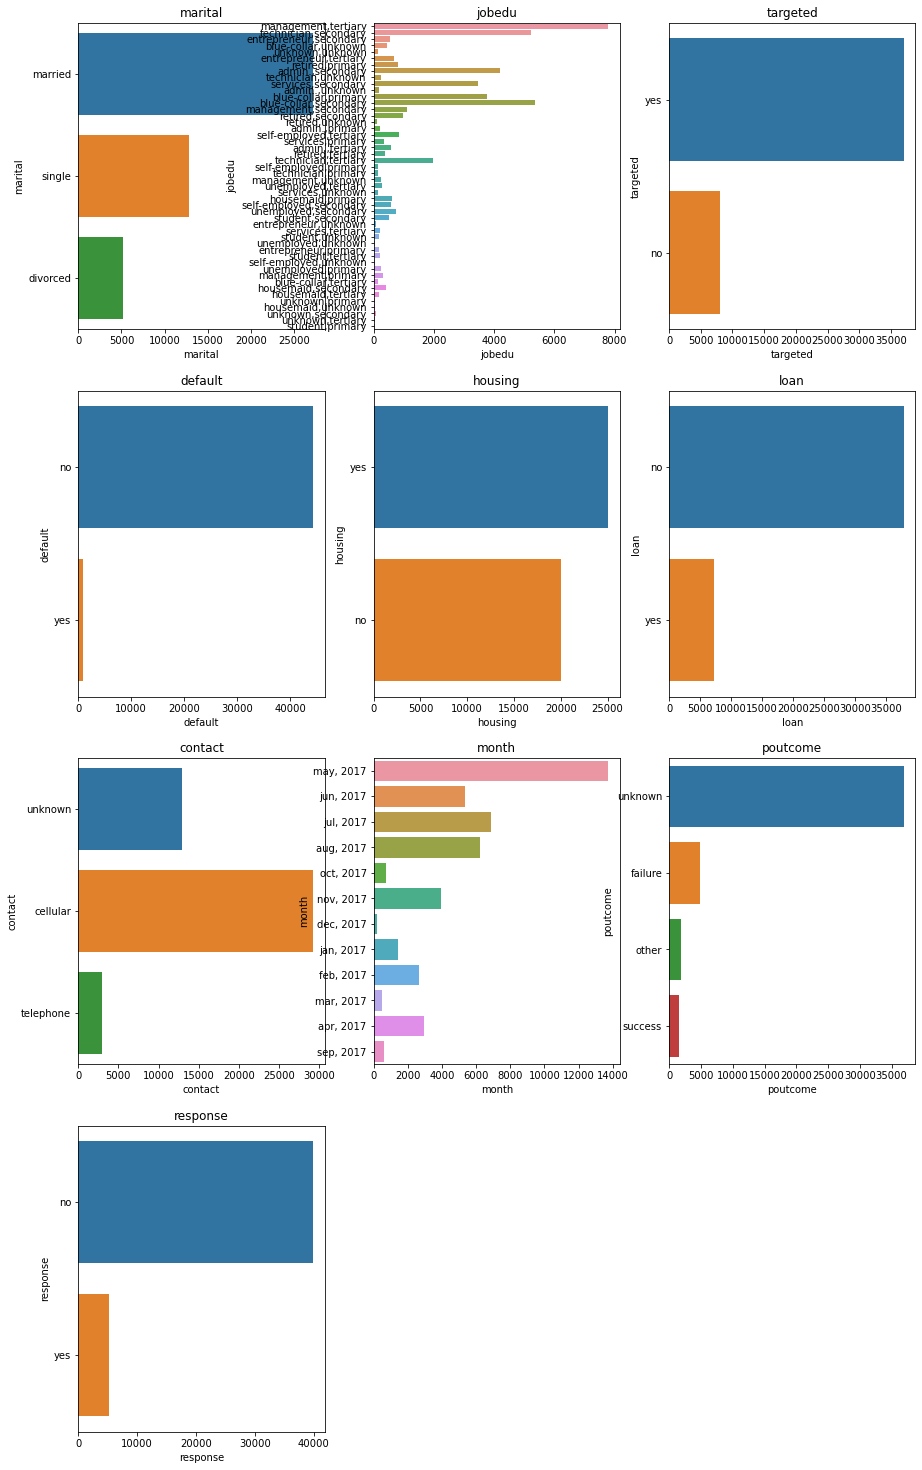

In [18]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in object_type:
    if categorical_feature == "duration":
        continue
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

<a id='spread_of_data'></a>
### By observing the graph above we can see how the data is distributed among various categories
- Most customers were married.
- Most of them were targeted before
- Most of them were contacted through cellular communication
- Surevey was conducted mainly in the month of may since many customer were contacted then.
- Outcome of previous contact is mostly unknown
- Response from majority of participants was NO

In [19]:
for i in column_description:
    print(i)

customer id and age.
nan
Customer salary and balance.
nan
Customer marital status and job with education level.
nan
particular customer before targeted or not
nan
Loan types: loans or housing loans
nan
Contact type
nan
month of contact
duration of call
nan
nan
nan
outcome of previous contact
response of customer after call happned


<a id='response_group_plot'></a>
## Count plot after grouping the data based on response field.

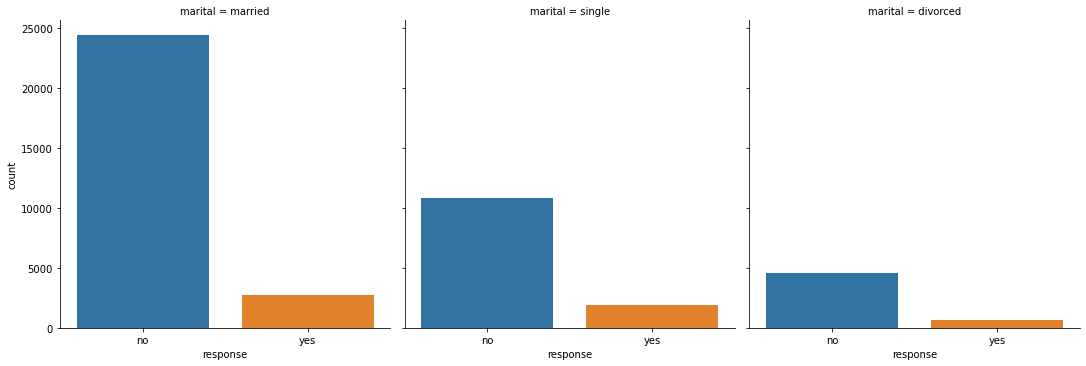

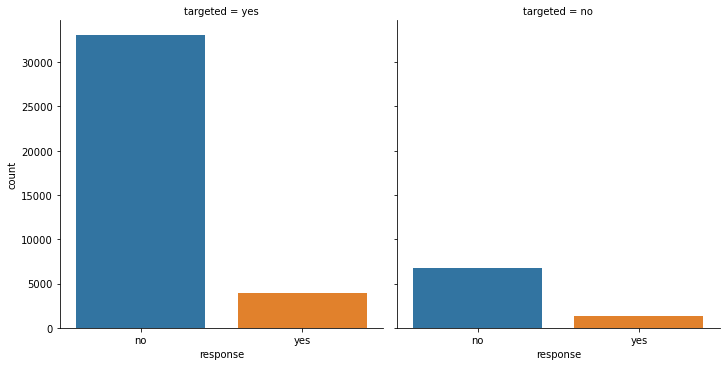

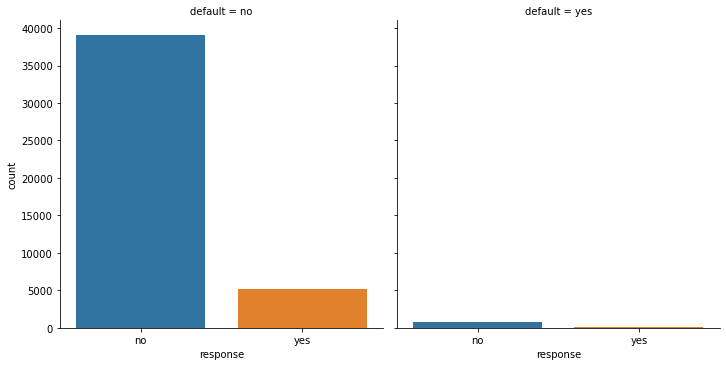

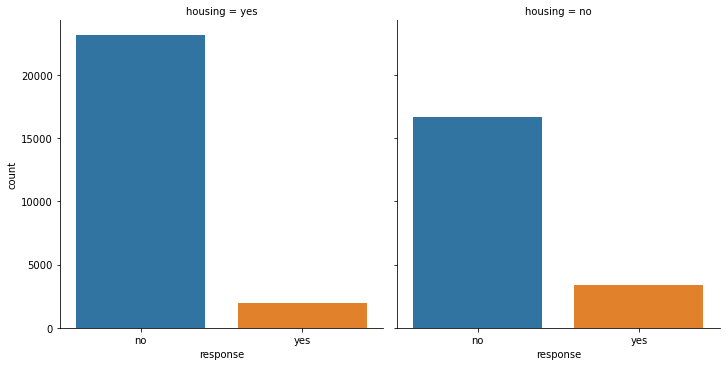

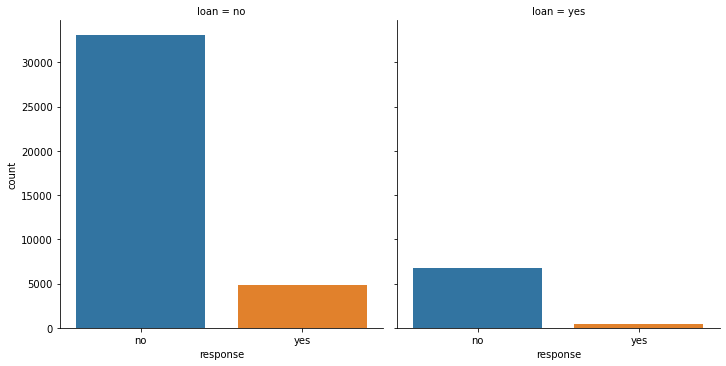

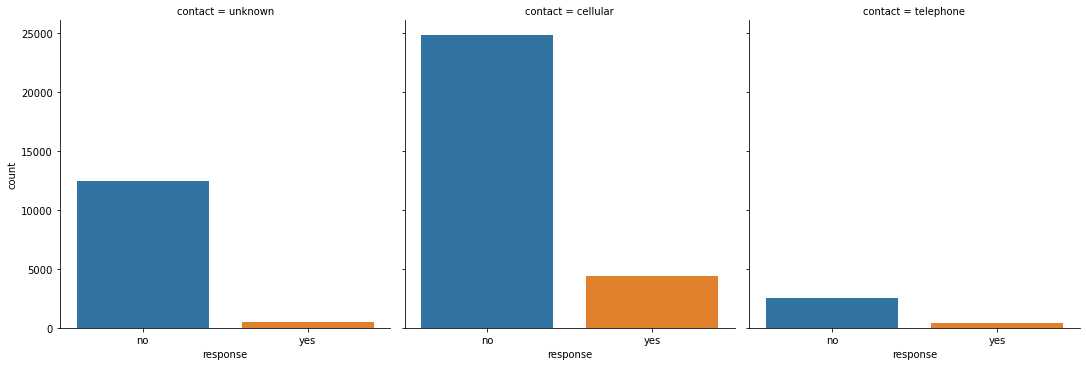

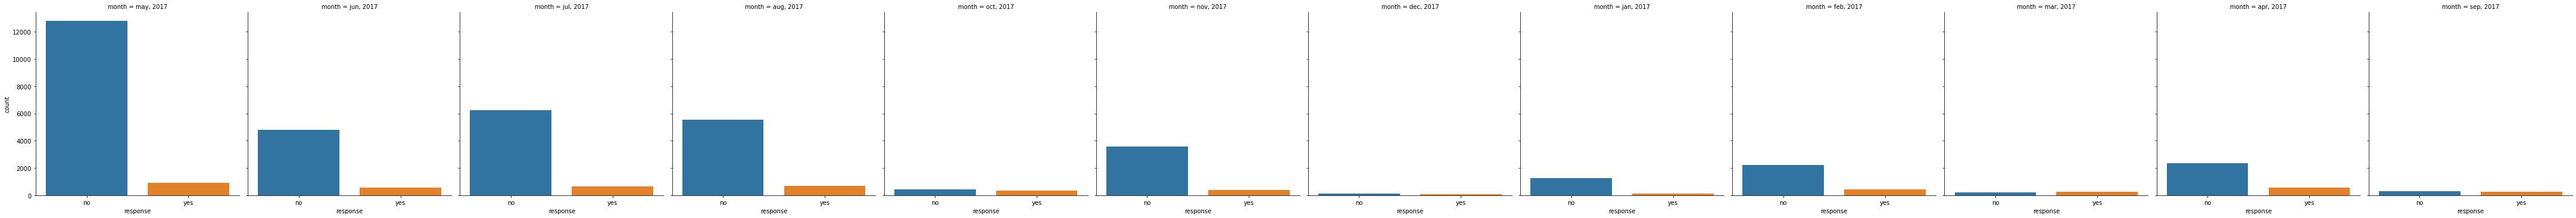

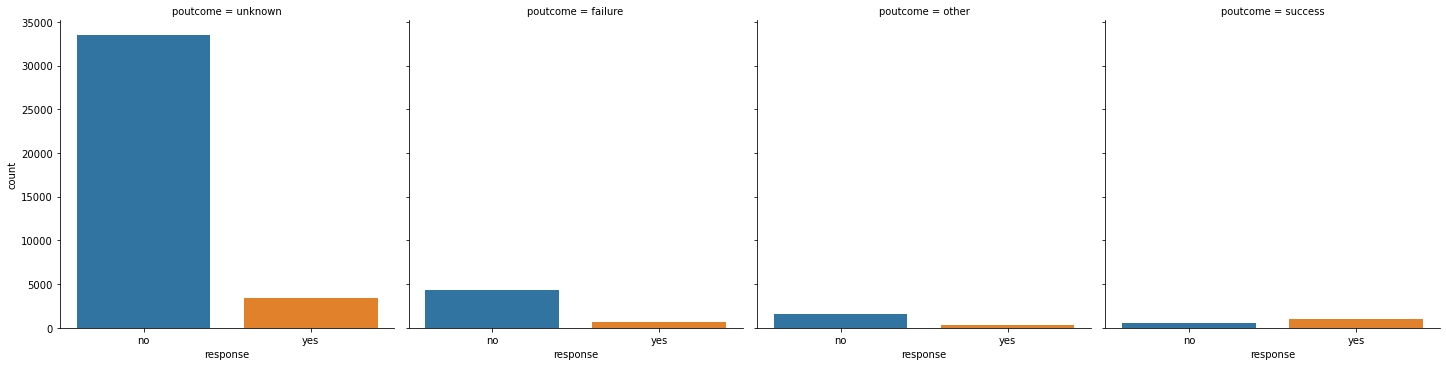

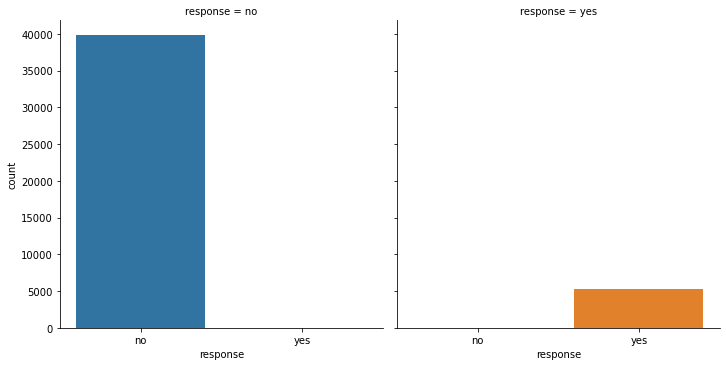

In [20]:
for categorical_feature in object_type:
    if categorical_feature == "duration" or categorical_feature == "jobedu":
        continue
    sns.catplot(x='response', col=categorical_feature, kind='count', data= df)
plt.show()

## At this point we realize that almost all data belongs to the response = "yes" category.
### This is a classic case of "class imbalance" and can reduce the accuracy of any algorithm drastically.
#### We Identify we need to solve this problem and the techniques that can be used to do the same are.

- Feature Level Approaches
>This approaches change the data distribution by either undersampling the majority classes or oversampling the minority classes so as to balance the data distribution.

- Data Augmentation
>To deal with class imbalance one of the solution is to collect more data.

- Metric Based Approaches.
>Metric-based approaches change the evaluation criteria used to judge the performance of the classifier.

- Algorithm Level Approaches
>Algorithm level approaches actually modify the learning algorithm to improve the performance of the classifier on the minority class.

### Given the nature of this project, The best solution is to apply "Feature Level Approach" and undersample the majority class

## To perform "Feature Level Transformation" we would be using "imblearn" module to undersample the data.

### To do this.. First we will be converting our data set into numerical encoded version usking sklearn LabelEncode

In [21]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [22]:
df.head()

1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [23]:
df_new = df.apply(lambda x: d[x.name].fit_transform(x))

In [24]:
df_new.head()

1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,0,40,9,3035,1,18,1,0,1,0,2,4,8,1361,0,0,0,3,0
1,1,26,7,944,2,37,1,0,1,0,2,4,8,725,0,0,0,3,0
2,2,15,10,917,1,9,1,0,1,1,2,4,8,2313,0,0,0,3,0
3,3,29,4,2419,1,7,0,0,1,0,2,4,8,2583,0,0,0,3,0
4,4,15,0,916,2,47,0,0,0,0,2,4,8,1011,0,0,0,3,0


In [25]:
df_encoded_Y = df_new['response']

In [26]:
df_encoded_X = df_new.drop(columns='response')

In [27]:
df_encoded_X

1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,40,9,3035,1,18,1,0,1,0,2,4,8,1361,0,0,0,3
1,1,26,7,944,2,37,1,0,1,0,2,4,8,725,0,0,0,3
2,2,15,10,917,1,9,1,0,1,1,2,4,8,2313,0,0,0,3
3,3,29,4,2419,1,7,0,0,1,0,2,4,8,2583,0,0,0,3
4,4,15,0,916,2,47,0,0,0,0,2,4,8,1011,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45106,33,7,1740,1,38,1,0,0,0,0,16,9,766,2,0,0,3
45207,45107,53,6,2638,0,20,1,0,0,0,0,16,9,2227,1,0,0,3
45208,45108,54,6,5453,1,21,1,0,0,0,0,16,9,932,4,181,3,2
45209,45109,39,4,1583,1,5,1,0,0,0,1,16,9,2383,3,0,0,3


In [28]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

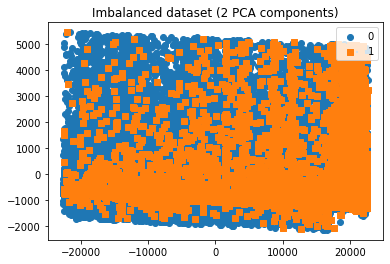

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(df_encoded_X)

plot_2d_space(X_2d, df_encoded_Y, 'Imbalanced dataset (2 PCA components)')

<a id='undersampling'></a>
## Exploring various undersampling techniques

In [30]:
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids



In [31]:
# tl = TomekLinks()
# X_tl, y_tl = tl.fit_resample(df_encoded_X, df_encoded_Y)

In [32]:
#Took too long to execute
#cc = ClusterCentroids(sampling_strategy ="majority")
#X_cc, y_cc = cc.fit_resample(df_encoded_X, df_encoded_Y)

In [33]:
ros = RandomUnderSampler(sampling_strategy="majority")
X_ros, y_ros = ros.fit_resample(df_encoded_X, df_encoded_Y)

In [34]:
# pca = PCA(n_components=2)
# X_2d = pca.fit_transform(X_tl)

# plot_2d_space(X_2d, y_tl, 'Balanced TomekLinks dataset (2 PCA components)')

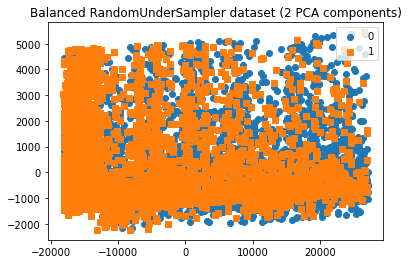

In [35]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_ros)

plot_2d_space(X_2d, y_ros, 'Balanced RandomUnderSampler dataset (2 PCA components)')

In [36]:
y_ros.value_counts()

0    5279
1    5279
Name: response, dtype: int64

In [37]:
# y_tl.value_counts()

In [38]:
df_encoded_Y.value_counts()

0    39832
1     5279
Name: response, dtype: int64

### Choosing Random undersampler as the best algorithm for undersampling

In [39]:
X_ros['response'] = y_ros

In [40]:
X_ros_reconverted = X_ros.apply(lambda x: d[x.name].inverse_transform(x))

<a id='undersample_plot'></a>

### Plots of Reconverted Data after doing undersampling

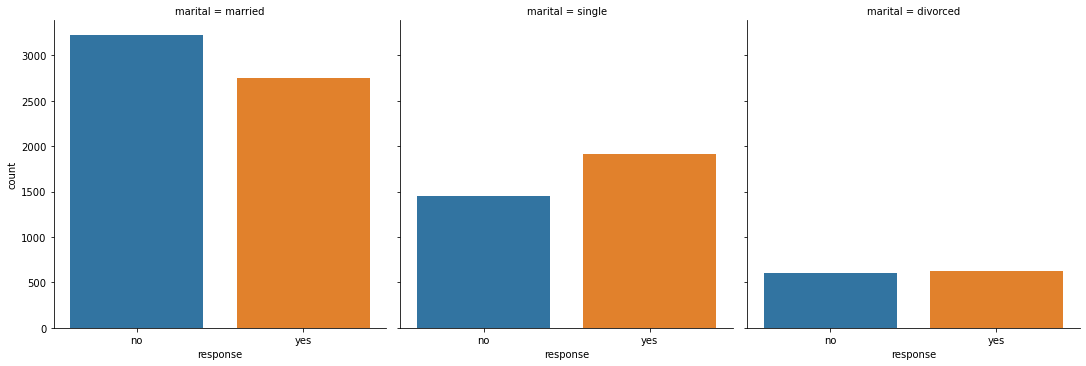

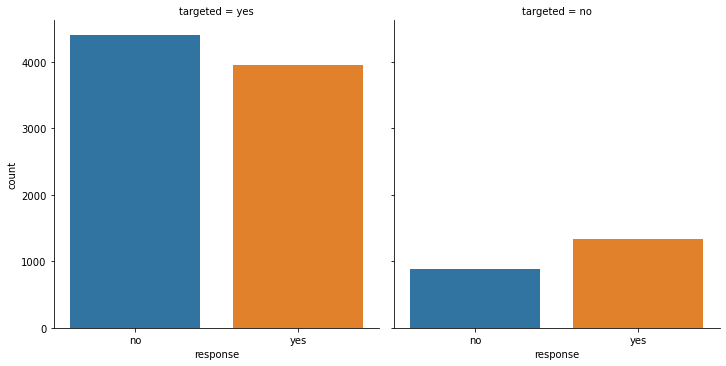

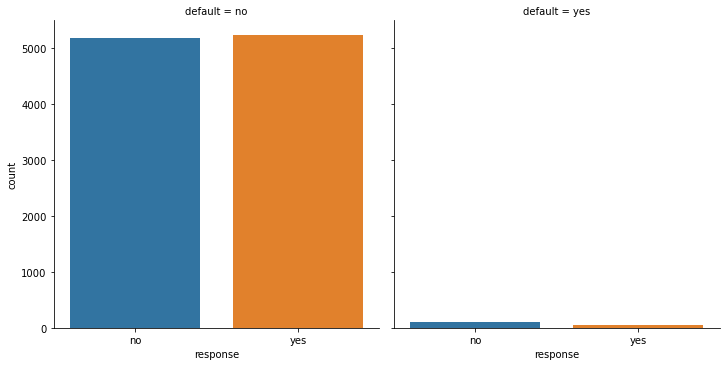

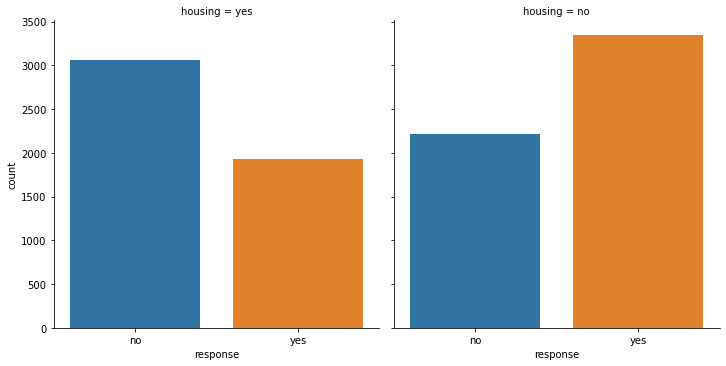

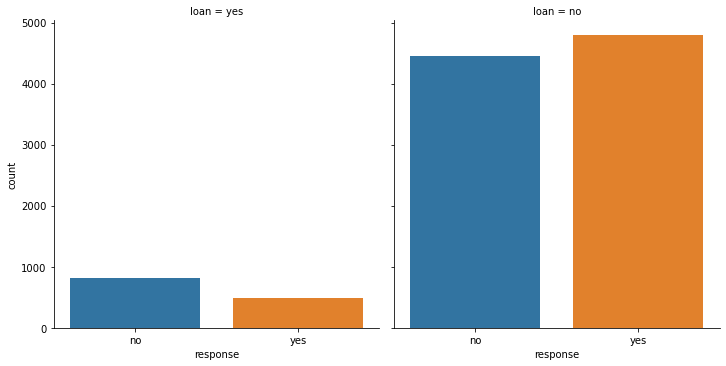

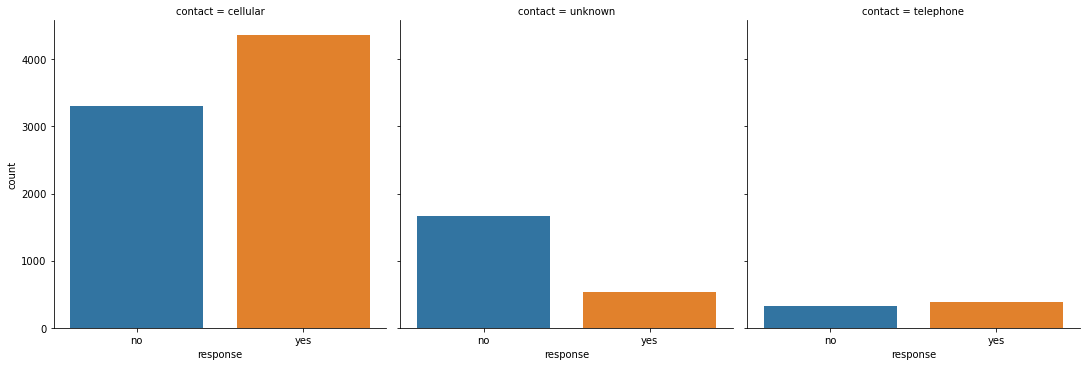

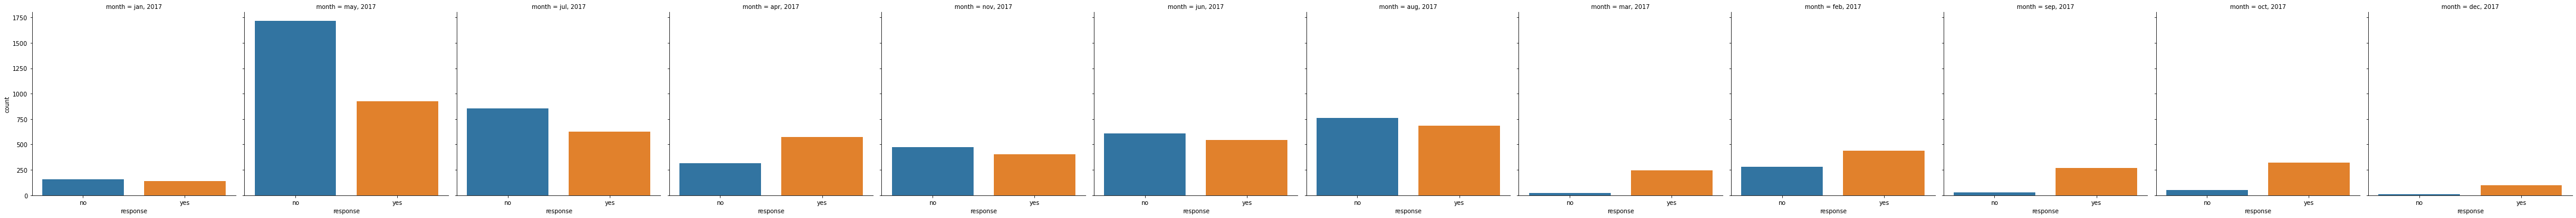

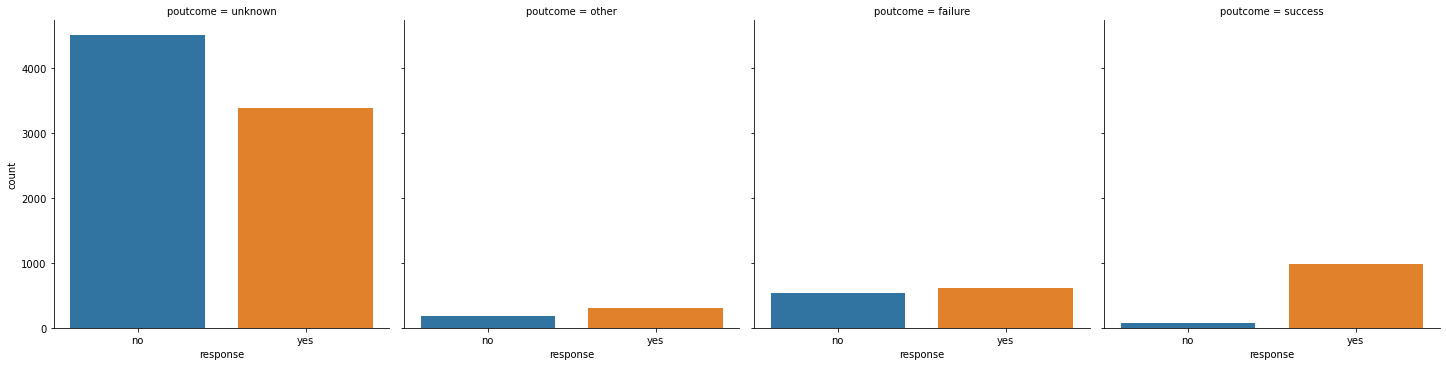

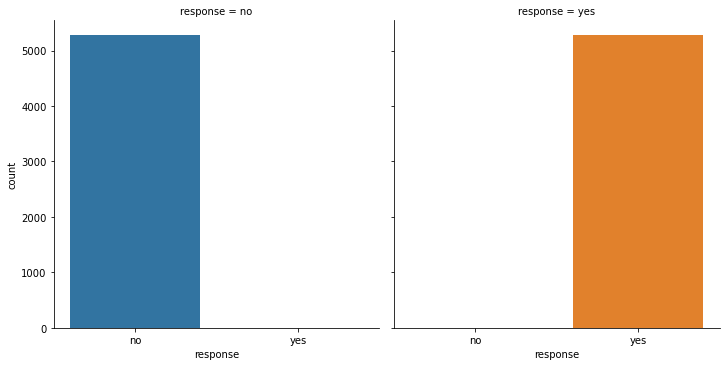

In [41]:
for categorical_feature in object_type:
    if categorical_feature == "duration" or categorical_feature == "jobedu":
         continue
    sns.catplot(x='response', col=categorical_feature, kind='count', data= X_ros_reconverted)
plt.show()

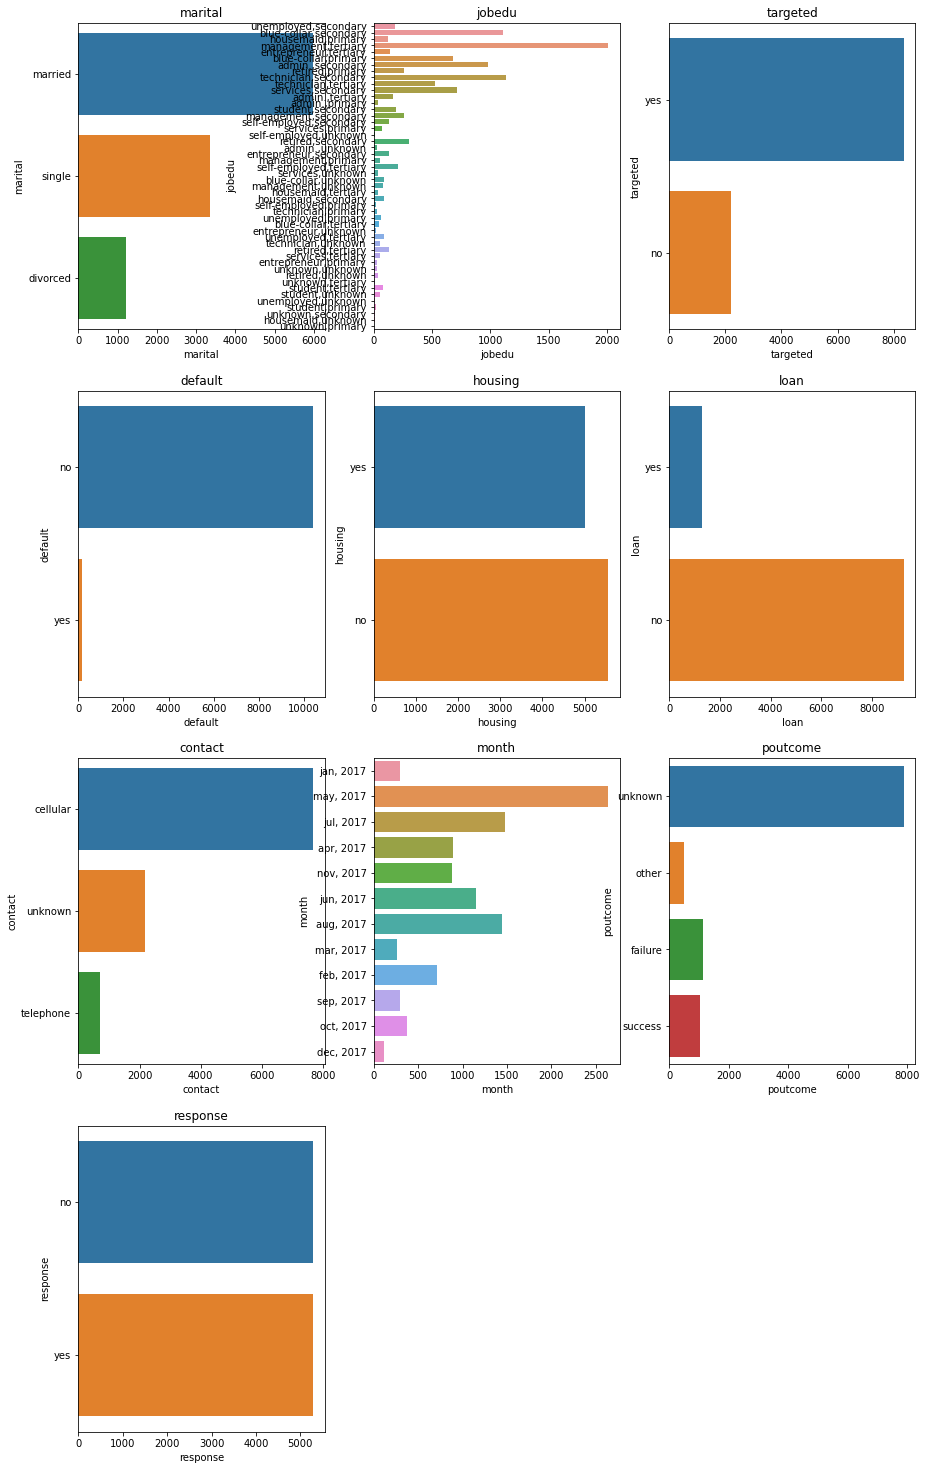

In [42]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in object_type:
    if categorical_feature == "duration":
        continue
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=X_ros_reconverted)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()


### We undersampled the data using RandomUnderSampler. Now both classes are near to each other and we also checked and found the structure of data distribution is also somewhat same as it was. Which means there's not much data loss. Hence, we can continue with EDA

In [43]:
for categorical_feature in object_type:
    print(X_ros_reconverted.groupby(['response',categorical_feature]).size())
    print()

response  marital 
no        divorced     602
          married     3223
          single      1454
yes       divorced     620
          married     2751
          single      1908
dtype: int64

response  jobedu             
no        admin.,primary          25
          admin.,secondary       476
          admin.,tertiary         62
          admin.,unknown          13
          blue-collar,primary    459
                                ... 
yes       unemployed,unknown       4
          unknown,primary          3
          unknown,secondary        9
          unknown,tertiary         4
          unknown,unknown         18
Length: 95, dtype: int64

response  targeted
no        no           877
          yes         4402
yes       no          1331
          yes         3948
dtype: int64

response  default
no        no         5170
          yes         109
yes       no         5227
          yes          52
dtype: int64

response  housing
no        no         2212
          yes        

In [44]:
numeric_type

['customerid',
 'age',
 'salary',
 'balance',
 'day',
 'campaign',
 'pdays',
 'previous']

<a id='skew_plot'></a>

## Data Skewness plot and it's obervation

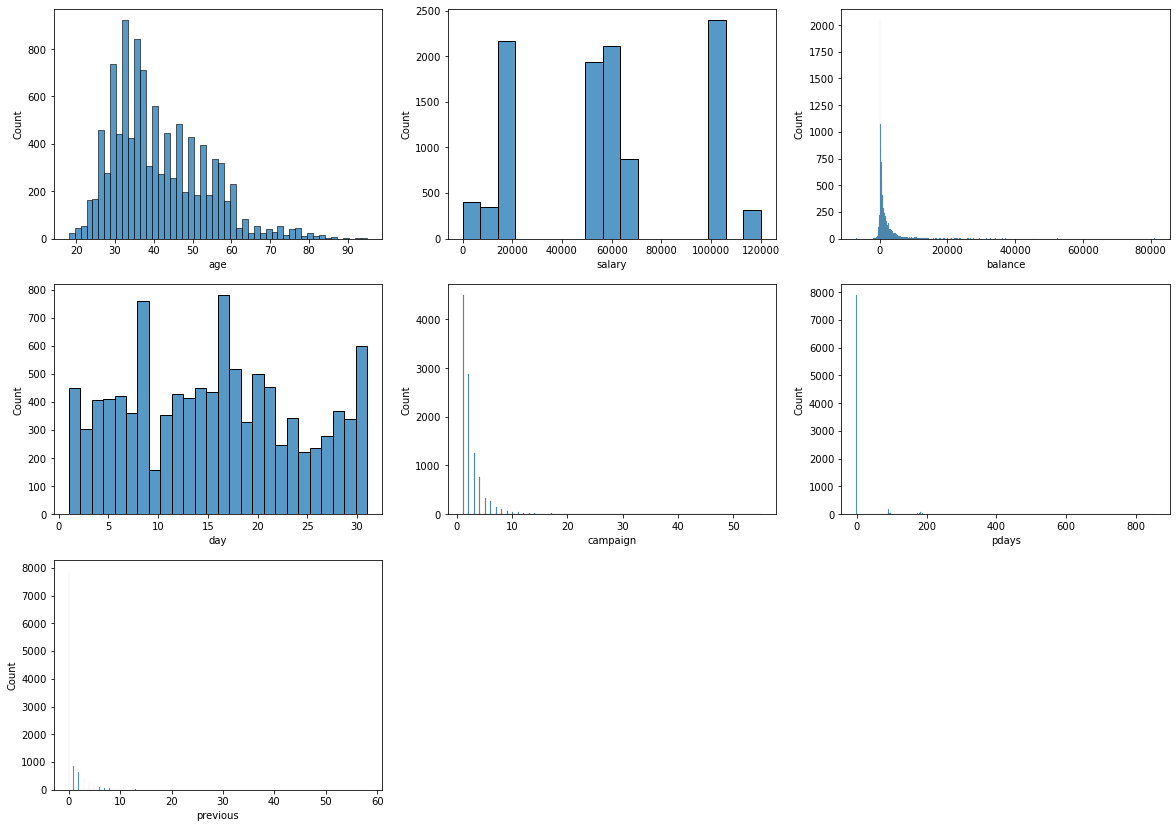

In [45]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in numeric_type:
    if  continuous_feature == "customerid":
        continue
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(X_ros_reconverted[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

### From histogram it is obvious that fields like balance, campaign, pdays, previous are heavily right skewed and must have contain outliers. This can be confirmed using box plots

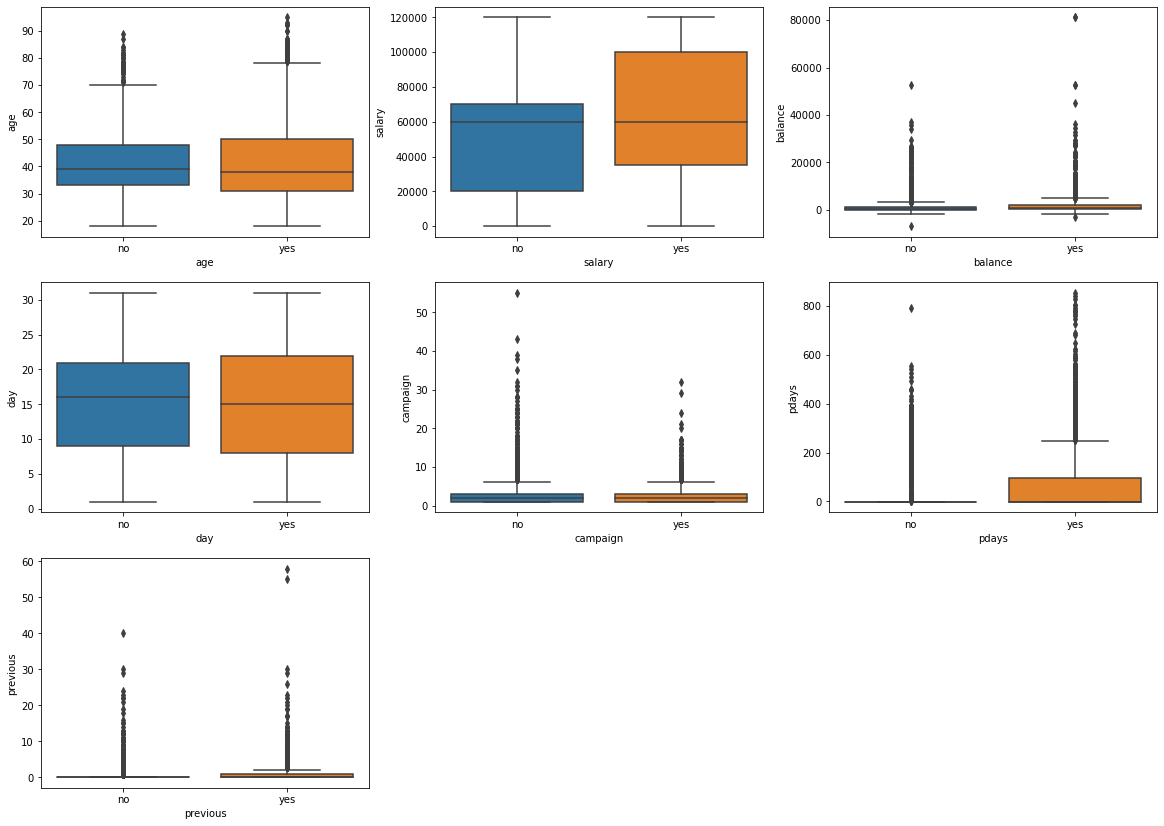

In [46]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in numeric_type:
    if  feature == "customerid":
        continue
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="response", y= X_ros_reconverted[feature], data=X_ros_reconverted)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

### Since outliers are present, we can check for skewness and decide threshold values

In [47]:
X_ros_reconverted['balance'].skew()

7.80207772582989

In [48]:
X_ros_reconverted['balance'].describe()

count    10558.000000
mean      1543.941940
std       3152.690622
min      -6847.000000
25%        126.000000
50%        558.000000
75%       1757.000000
max      81204.000000
Name: balance, dtype: float64

<a id='removing_outliers'></a>

### Since most data is in outlier.. Changing the industry standard of 1.5 times IQR to 3 times IQR

## Removing outliers

In [49]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (2 * IQR)
    upper_range = Q3 + (2 * IQR)
    return lower_range,upper_range

In [50]:
for feature in numeric_type:
    lowerbound, upperbound = outlier_treatment(X_ros_reconverted[feature])
    print(feature, lowerbound, upperbound)
    print(X_ros_reconverted[(X_ros_reconverted[feature] < lowerbound) | (X_ros_reconverted[feature] > upperbound)].count())

customerid -33250.5 89104.5
1
customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
dtype: int64
age -2.0 83.0
1
customerid    27
age           27
salary        27
balance       27
marital       27
jobedu        27
targeted      27
default       27
housing       27
loan          27
contact       27
day           27
month         27
duration      27
campaign      27
pdays         27
previous      27
poutcome      27
response      27
dtype: int64
salary -140000.0 260000.0
1
customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
p

### The above output shows that the column pdays only contains outliers. hence dropping that column first.

In [51]:
X_ros_reconverted.drop(columns='pdays', inplace=True)


In [52]:
X_ros_reconverted.drop(columns='customerid', inplace=True)


In [53]:
numeric_type.remove("pdays")


In [54]:
numeric_type.remove("customerid")

In [55]:
for feature in numeric_type:
    lowerbound, upperbound = outlier_treatment(X_ros_reconverted[feature])
    values = X_ros_reconverted[(X_ros_reconverted[feature] < lowerbound) | (X_ros_reconverted[feature] > upperbound)]
    X_ros_reconverted.drop(values.index, inplace=True)
    

<a id='after_removing_outliers'></a>

### Plot after removing outliers

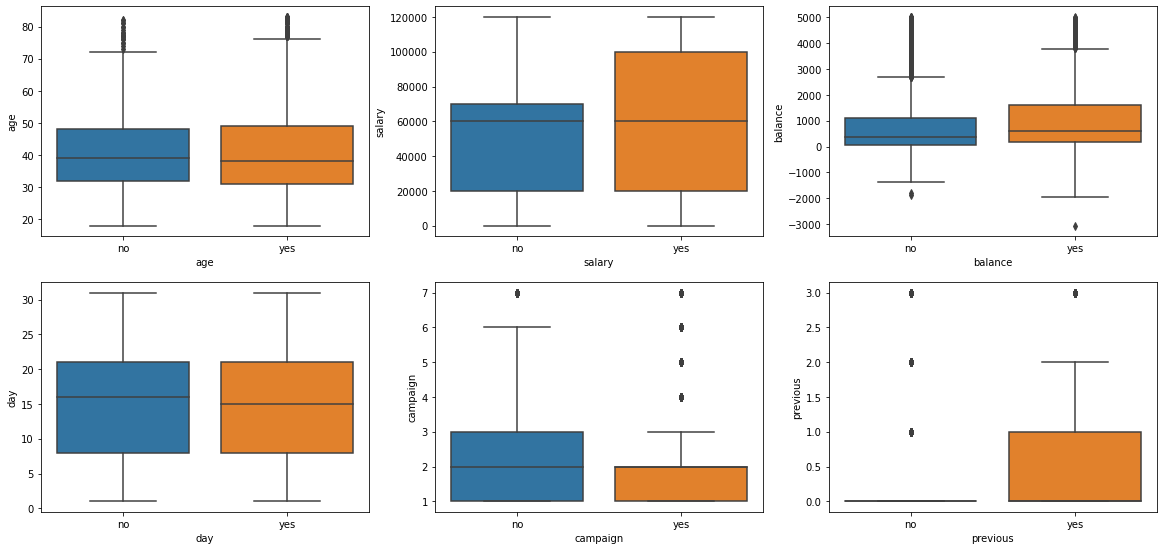

In [56]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in numeric_type:
    if  feature == "customerid":
        continue
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="response", y= X_ros_reconverted[feature], data=X_ros_reconverted)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [57]:
X_ros_reconverted['response'].value_counts()

no     4485
yes    4201
Name: response, dtype: int64

In [58]:
df['response'].value_counts()

no     39832
yes     5279
Name: response, dtype: int64

<AxesSubplot:xlabel='1', ylabel='1'>

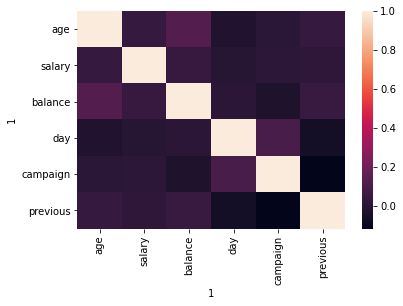

In [59]:
sns.heatmap(X_ros_reconverted.corr())

In [60]:
X_ros_reconverted.drop(columns='previous', inplace=True)

In [61]:
X_ros_reconverted.shape

(8686, 16)

In [62]:
Encoded_X = X_ros_reconverted.apply(lambda x: d[x.name].fit_transform(x))

In [63]:
Encoded_X.head()

1,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,poutcome,response
0,20,2,402,1,41,1,0,1,1,0,29,4,1774,0,3,0
1,21,4,2895,2,5,1,0,1,0,2,19,8,465,1,3,0
2,10,3,402,2,12,1,0,0,1,0,28,5,819,3,3,0
3,10,4,308,1,5,1,0,1,0,2,20,8,1043,1,3,0
5,17,10,1978,1,10,1,0,1,0,0,6,0,856,0,0,0


<AxesSubplot:xlabel='1', ylabel='1'>

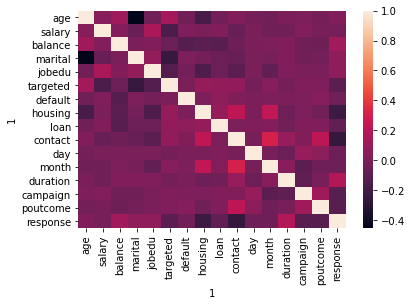

In [64]:
sns.heatmap(Encoded_X.corr())

## 1- Response Prediction Model

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [66]:
Encoded_Y = Encoded_X['response']


In [67]:
Encoded_X.drop(columns='response', inplace=True)

In [68]:

X_train, X_test, y_train, y_test = train_test_split(Encoded_X, Encoded_Y, train_size=0.7, random_state=123)

<a id='multi_model'></a>
### Testing multiple models

In [69]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier()
]

for model in models:
    model.fit(X_train, y_train)
    
model_names = [
    "   Logistic Regression",
    "Support Vector Machine",
    "         Decision Tree",
    "        Neural Network",
    "         Random Forest"
]

for model, name in zip(models, model_names):
    print(name + ": {:.4f}%".format(model.score(X_test, y_test) * 100))

C:\Users\Void\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   Logistic Regression: 64.2364%
Support Vector Machine: 60.7828%
         Decision Tree: 73.2540%
        Neural Network: 68.9946%
         Random Forest: 80.6984%


### The accuracy was low so scaling data to try and improve accuracy

In [70]:
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(Encoded_X), columns=Encoded_X.columns)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Encoded_Y, train_size=0.7, random_state=123)

In [72]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier()
]

for model in models:
    model.fit(X_train, y_train)
    
model_names = [
    "   Logistic Regression",
    "Support Vector Machine",
    "         Decision Tree",
    "        Neural Network",
    "         Random Forest"
]

for model, name in zip(models, model_names):
    print(name + ": {:.4f}%".format(model.score(X_test, y_test) * 100))

C:\Users\Void\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


   Logistic Regression: 66.9992%
Support Vector Machine: 69.6086%
         Decision Tree: 72.8703%
        Neural Network: 72.0261%
         Random Forest: 80.7368%


<a id='grid_search'></a>

### As we are getting best result using Random Forest classifier. Attempting to improve it's accuracy even further.

In [73]:
rfc = models[-1]

In [74]:
rfc

RandomForestClassifier()

In [75]:
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [76]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [77]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [78]:
display(cv)


Best parameters are: {'max_depth': 16, 'n_estimators': 250}


0.663 + or -0.028 for the {'max_depth': 2, 'n_estimators': 5}
0.694 + or -0.019 for the {'max_depth': 2, 'n_estimators': 10}
0.702 + or -0.01 for the {'max_depth': 2, 'n_estimators': 50}
0.699 + or -0.007 for the {'max_depth': 2, 'n_estimators': 100}
0.7 + or -0.008 for the {'max_depth': 2, 'n_estimators': 250}
0.705 + or -0.016 for the {'max_depth': 4, 'n_estimators': 5}
0.706 + or -0.011 for the {'max_depth': 4, 'n_estimators': 10}
0.722 + or -0.012 for the {'max_depth': 4, 'n_estimators': 50}
0.713 + or -0.009 for the {'max_depth': 4, 'n_estimators': 100}
0.713 + or -0.007 for the {'max_depth': 4, 'n_estimators': 250}
0.729 + or -0.011 for the {'max_depth': 8, 'n_estimators': 5}
0.756 + or -0.008 for the {'max_depth': 8, 'n_estimators': 10}
0.759 + or -0.01 for the {'max_depth': 8, 'n_estimators': 50}
0.762 + or -0.011 for the {'max_depth': 8, 'n_estimators': 100}
0.764 + or -0.011 for the {'max_depth': 8, 'n_estimators':

### Selecting max_depth as 16 and n_estimators as 250 since it is showing best results

In [79]:
model = RandomForestClassifier(n_estimators=250, max_depth=16)

In [80]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=250)

In [81]:
model.score(X_test, y_test) * 100

80.31465848042978

In [82]:
prediction = model.predict(X_test)

In [83]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1340
           1       0.80      0.79      0.80      1266

    accuracy                           0.80      2606
   macro avg       0.80      0.80      0.80      2606
weighted avg       0.80      0.80      0.80      2606



<a id='smote'></a>
## Improving accuracy using oversampling techniques

In [84]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(scaled_X, Encoded_Y)


xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2)


model_dt_smote = RandomForestClassifier(n_estimators=250, max_depth=16)
model_dt_smote.fit(xr_train, yr_train)


yr_predict = model_dt_smote.predict(xr_test)
print(classification_report(yr_test, yr_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       279
           1       0.97      0.94      0.95       296

    accuracy                           0.95       575
   macro avg       0.95      0.95      0.95       575
weighted avg       0.95      0.95      0.95       575



<a id='knn_vs_lr'></a>
## 2- Churn Prediction using Logistic Regression and KNN Classifier

#### The data is already augmented and encoded as required

In [85]:
model_lr = LogisticRegression()
model_lr.fit(xr_train, yr_train)


LogisticRegression()

In [86]:
prediction_lr = model_lr.predict(xr_test)

In [87]:
print(classification_report(yr_test, prediction_lr))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       279
           1       0.84      0.88      0.86       296

    accuracy                           0.85       575
   macro avg       0.85      0.85      0.85       575
weighted avg       0.85      0.85      0.85       575



In [88]:
model_knn = KNeighborsClassifier()
model_knn.fit(xr_train, yr_train)

KNeighborsClassifier()

In [89]:
prediction_knn = model_knn.predict(xr_test)

In [90]:
print(classification_report(yr_test, prediction_knn))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       279
           1       0.95      0.92      0.93       296

    accuracy                           0.93       575
   macro avg       0.93      0.93      0.93       575
weighted avg       0.93      0.93      0.93       575



In [91]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xr_train, yr_train)
    y_pred = knn.predict(xr_test)
    scores.append(accuracy_score(yr_test, y_pred))
    


Text(0, 0.5, 'Testing Accuracy')

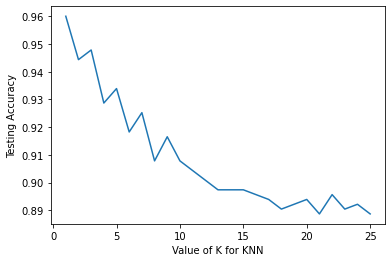

In [92]:
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [93]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(xr_train, yr_train)
prediction_knn = model_knn.predict(xr_test)
print(classification_report(yr_test, prediction_knn))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       279
           1       0.95      0.95      0.95       296

    accuracy                           0.95       575
   macro avg       0.95      0.95      0.95       575
weighted avg       0.95      0.95      0.95       575

